# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ACCESSING THE DATASET

In [2]:
titanic_data = pd.read_csv("titanic_test.csv",encoding = 'unicode_escape')
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# INSPECTING THE DATASET

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic_data.shape

(418, 12)

In [6]:
titanic_data= titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


In [7]:
titanic_data['Sex'].replace({'male':0, 'female':1}, inplace=True)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,7.8292,NaN,Q
1,1,3,1,47.0,1,0,7.0000,NaN,S
2,0,2,0,62.0,0,0,9.6875,NaN,Q
3,0,3,0,27.0,0,0,8.6625,NaN,S
4,1,3,1,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,NaN,S
414,1,1,1,39.0,0,0,108.9000,C105,C
415,0,3,0,38.5,0,0,7.2500,NaN,S
416,0,3,0,NaN,0,0,8.0500,NaN,S


In [8]:
titanic_data['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,7.8292,NaN,2
1,1,3,1,47.0,1,0,7.0000,NaN,0
2,0,2,0,62.0,0,0,9.6875,NaN,2
3,0,3,0,27.0,0,0,8.6625,NaN,0
4,1,3,1,22.0,1,1,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,NaN,0
414,1,1,1,39.0,0,0,108.9000,C105,1
415,0,3,0,38.5,0,0,7.2500,NaN,0
416,0,3,0,NaN,0,0,8.0500,NaN,0


# Checking the missing data

In [9]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [10]:
titanic_data=titanic_data.drop(['Cabin'],axis=1)
titanic_data                          

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,0
414,1,1,1,39.0,0,0,108.9000,1
415,0,3,0,38.5,0,0,7.2500,0
416,0,3,0,NaN,0,0,8.0500,0


In [11]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

In [12]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Training data &Testing data

In [13]:
x=titanic_data.drop(['Survived'],axis=1)
y=titanic_data['Survived']

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=3)

In [15]:
print(x.shape,x_train.shape,x_test.shape)

(418, 7) (292, 7) (126, 7)


# PLOTTING THE DATA

In [16]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

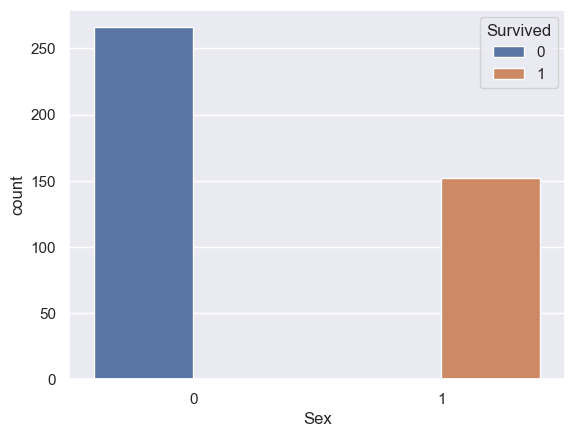

In [17]:
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

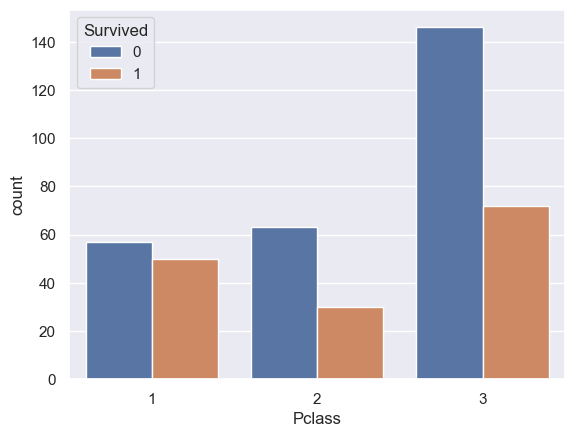

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

In [19]:
titanic_data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

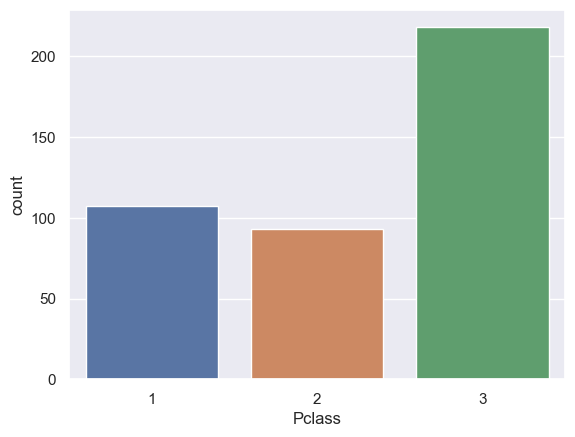

In [20]:
sns.countplot(x='Pclass', data=titanic_data)

In [21]:
titanic_data['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

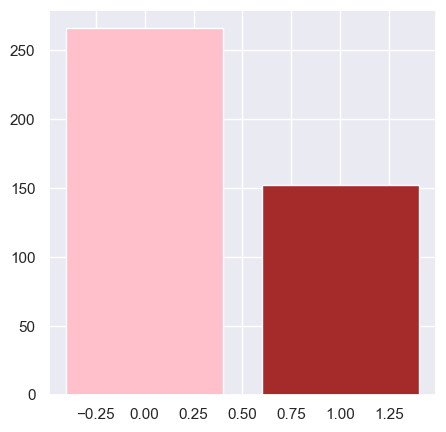

In [22]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_data['Sex'].value_counts().keys()),list(titanic_data['Sex'].value_counts()),color=["pink","brown"])
plt.show()

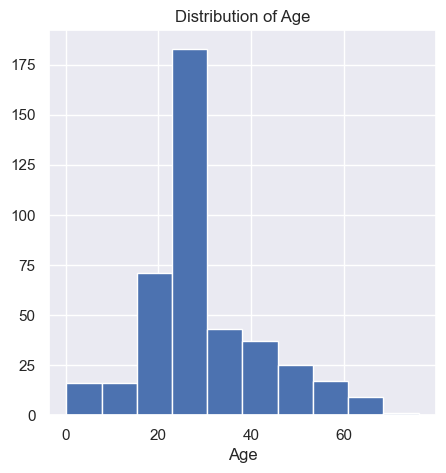

In [23]:
plt.figure(figsize=(5,5))
plt.hist(titanic_data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

# Logistic Regression

In [24]:
model=LogisticRegression(max_iter=1000)

In [25]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# Accuracy Score

In [26]:
x_train_prediction=model.predict(x_train)
print(x_train_prediction)

[0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1]


In [27]:
training_accuracy=accuracy_score(y_train,x_train_prediction)
print(training_accuracy)

1.0


In [28]:
x_test_prediction=model.predict(x_test)
print(x_test_prediction)

[0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0
 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0]


In [29]:
test_accuracy=accuracy_score(y_test,x_test_prediction)
print(test_accuracy)

1.0


In [30]:
x_train=titanic_data[['Age']]
y_train=titanic_data[['Survived']]

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtc = DecisionTreeClassifier()

In [33]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
sum(titanic_data['Age'].isnull())

0

In [35]:
titanic_data=titanic_data.dropna()

In [36]:
sum(titanic_data['Age'].isnull())

0

In [37]:
x_test=titanic_data[['Age']]

In [38]:
y_pred=dtc.predict(x_test)

In [39]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,